In [464]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

In [465]:
caminho_arquivo_excel = '/content/drive/MyDrive/ProjetoVeins/ModeloRegressaoLinear/dataset80vh (1).xlsx'
df = pd.read_excel(caminho_arquivo_excel)
print(df.head())

   ID  Posicao  Velocidade
0  16        0           0
1  16       30           1
2  16       31           3
3  16       35           5
4  16       41           6


In [466]:
series_contagem = []

contador_por_id = {}

for indice, linha in df.iterrows():
    id_atual = linha['ID']

    # Se o id atual não existir no dicionário, inicializa o contador para 1
    if id_atual not in contador_por_id:
        contador_por_id[id_atual] = 1
    else:
        # Caso contrário, incrementa o contador
        contador_por_id[id_atual] += 1

    # Adiciona o valor do contador à lista
    series_contagem.append(contador_por_id[id_atual])


df['Tempo'] = series_contagem

print(df)

       ID  Posicao  Velocidade  Tempo
0      16        0           0      1
1      16       30           1      2
2      16       31           3      3
3      16       35           5      4
4      16       41           6      5
...   ...      ...         ...    ...
2976  496      524          19     31
2977  496      543          18     32
2978  496      562          20     33
2979  496      582          20     34
2980  496      603          20     35

[2981 rows x 4 columns]


In [467]:
filtered_df = df[df['ID'] == 16]
print(filtered_df)

    ID  Posicao  Velocidade  Tempo
0   16        0           0      1
1   16       30           1      2
2   16       31           3      3
3   16       35           5      4
4   16       41           6      5
5   16       47           8      6
6   16       56           9      7
7   16       66          11      8
8   16       77          13      9
9   16       91          16     10
10  16      107          18     11
11  16      126          20     12
12  16      146          21     13
13  16      167          22     14
14  16      189          21     15
15  16      210          21     16
16  16      231          21     17
17  16      253          21     18
18  16      275          22     19
19  16      297          21     20
20  16      318          21     21
21  16      340          21     22
22  16      361          21     23
23  16      382          22     24
24  16      404          21     25
25  16      426          22     26
26  16      448          21     27
27  16      470     

In [468]:
# Reorganizando as colunas e removendo a coluna 'ID'
df_reorganized = filtered_df[['Tempo', 'Velocidade', 'Posicao']]

# Mostrando o DataFrame reorganizado
print("\nDataFrame Reorganizado:")
print(df_reorganized)


DataFrame Reorganizado:
    Tempo  Velocidade  Posicao
0       1           0        0
1       2           1       30
2       3           3       31
3       4           5       35
4       5           6       41
5       6           8       47
6       7           9       56
7       8          11       66
8       9          13       77
9      10          16       91
10     11          18      107
11     12          20      126
12     13          21      146
13     14          22      167
14     15          21      189
15     16          21      210
16     17          21      231
17     18          21      253
18     19          22      275
19     20          21      297
20     21          21      318
21     22          21      340
22     23          21      361
23     24          22      382
24     25          21      404
25     26          22      426
26     27          21      448
27     28          22      470
28     29          22      492
29     30          21      514
30     31     

<Axes: xlabel='Tempo'>

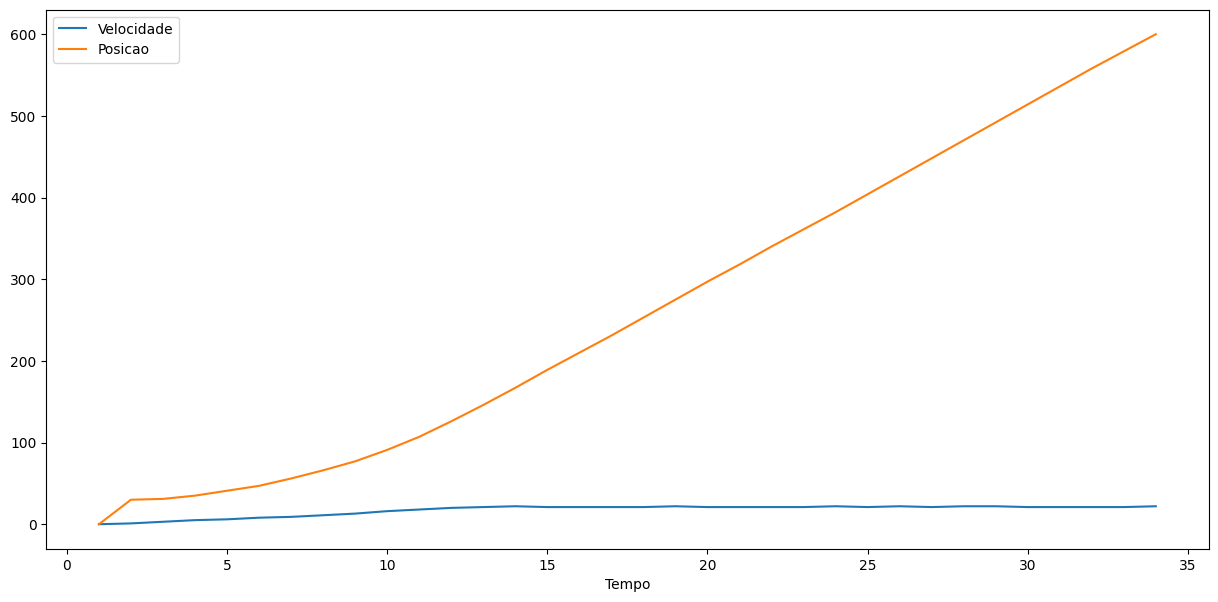

In [469]:
df_reorganized.columns=["Tempo", "Velocidade", "Posicao"]
df_reorganized.head()
df_reorganized.describe()
df_reorganized.set_index('Tempo',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df_reorganized.plot()

In [470]:
test_result=adfuller(df_reorganized['Velocidade'])

In [471]:
test_result=adfuller(df_reorganized['Posicao'])

In [472]:
print(df_reorganized.columns)

Index(['Velocidade', 'Posicao'], dtype='object')


In [473]:
def adfuller_test(Velocidade):
    result = adfuller(Velocidade)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    # Indentation corrected to include the if statement within the function
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df_reorganized['Velocidade'])

ADF Test Statistic : -4.575007418464391
p-value : 0.0001435865903982572
#Lags Used : 0
Number of Observations : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [474]:
print(df_reorganized.columns)

Index(['Velocidade', 'Posicao'], dtype='object')


In [475]:
def adfuller_test(Posicao):
    result = adfuller(Posicao)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    # Indentation corrected to include the if statement within the function
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df_reorganized['Posicao'])

ADF Test Statistic : 3.377787298365359
p-value : 1.0
#Lags Used : 1
Number of Observations : 32
weak evidence against null hypothesis,indicating it is non-stationary 


In [476]:
df_reorganized['Posicao diferenca'] = df_reorganized['Posicao'] - df_reorganized['Posicao'].shift(1)
df_reorganized['Posicao sazonal diferenca']=df_reorganized['Posicao']-df_reorganized['Posicao'].shift(12)
df_reorganized.head()

<ipython-input-476-bf7ddd0fb74a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reorganized['Posicao diferenca'] = df_reorganized['Posicao'] - df_reorganized['Posicao'].shift(1)


,Velocidade,Posicao,Posicao diferenca,Posicao sazonal diferenca
Tempo,,,,
1,0,0,NaN,NaN
2,1,30,30.0,NaN
3,3,31,1.0,NaN
4,5,35,4.0,NaN
5,6,41,6.0,NaN


In [477]:
print(df_reorganized)

       Velocidade  Posicao  Posicao diferenca  Posicao sazonal diferenca
Tempo                                                                   
1               0        0                NaN                        NaN
2               1       30               30.0                        NaN
3               3       31                1.0                        NaN
4               5       35                4.0                        NaN
5               6       41                6.0                        NaN
6               8       47                6.0                        NaN
7               9       56                9.0                        NaN
8              11       66               10.0                        NaN
9              13       77               11.0                        NaN
10             16       91               14.0                        NaN
11             18      107               16.0                        NaN
12             20      126               19.0      

In [478]:
adfuller_test(df_reorganized['Posicao sazonal diferenca'].dropna())

ADF Test Statistic : -2.0648415368810156
p-value : 0.2588848903891364
#Lags Used : 8
Number of Observations : 13
weak evidence against null hypothesis,indicating it is non-stationary 


In [479]:
df_reorganized['Posicao_dif'] = df_reorganized['Posicao'].diff().dropna()

In [480]:
adf_result = adfuller(df_reorganized['Posicao_dif'].dropna())

print(f'ADF Test Statistic : {adf_result[0]}')
print(f'p-value : {adf_result[1]}')
print(f'#Lags Used : {adf_result[2]}')
print(f'Number of Observations : {adf_result[3]}')

ADF Test Statistic : -2.8317259402425314
p-value : 0.05388289844431537
#Lags Used : 0
Number of Observations : 32


<Axes: xlabel='Tempo'>

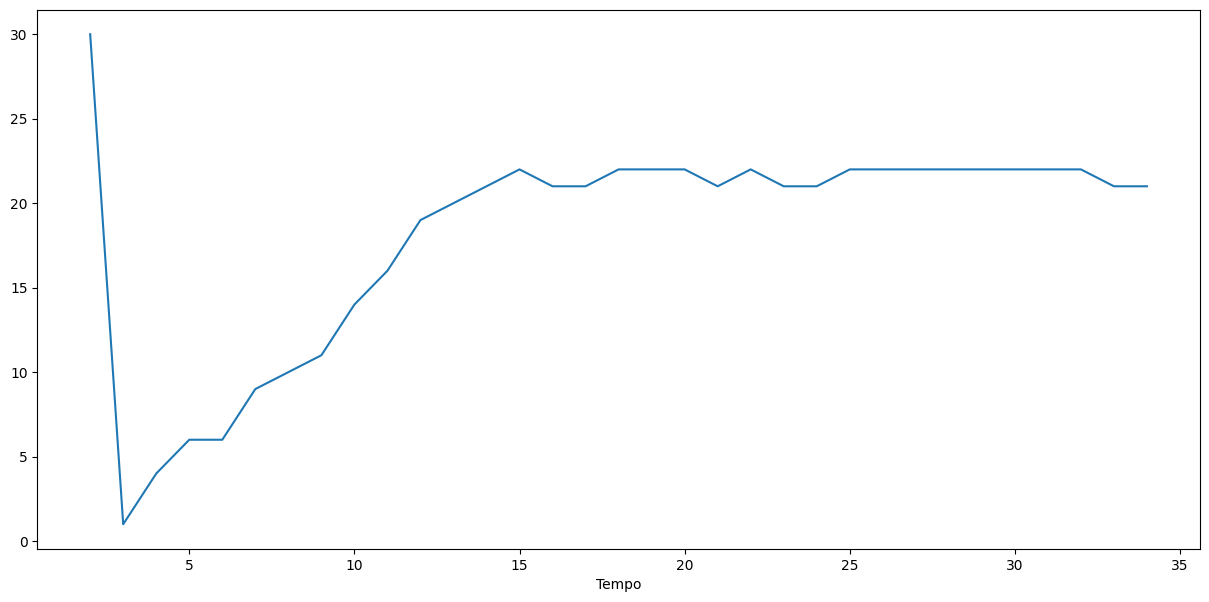

In [481]:
df_reorganized['Posicao_dif'].plot()

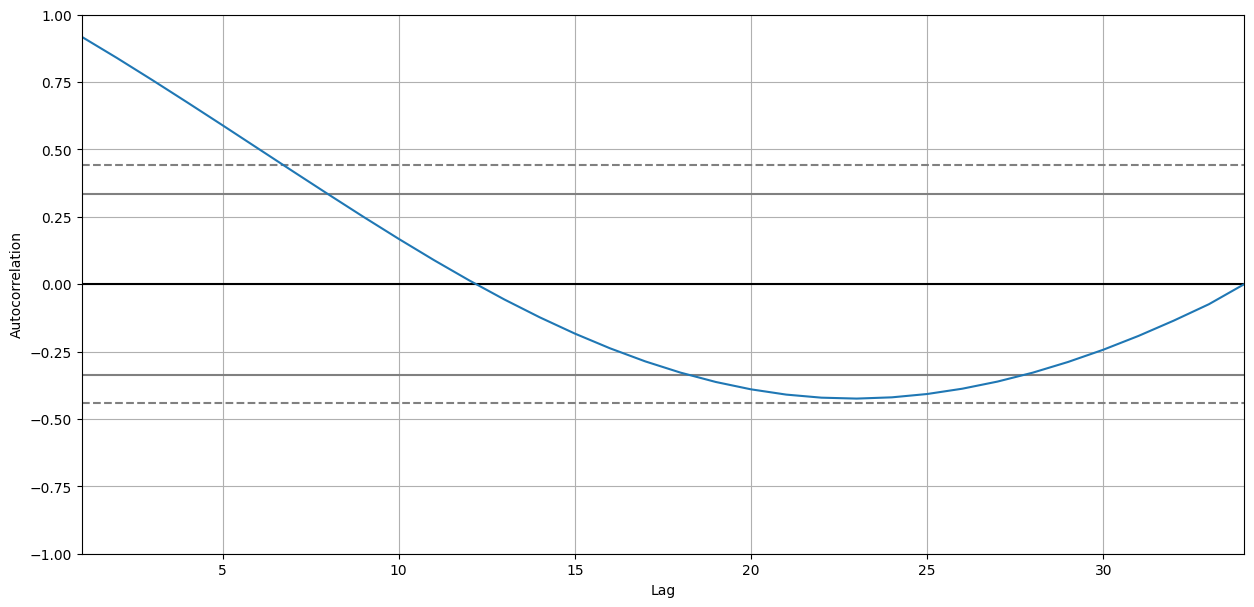

In [482]:
autocorrelation_plot(df_reorganized['Posicao'])
plt.show()

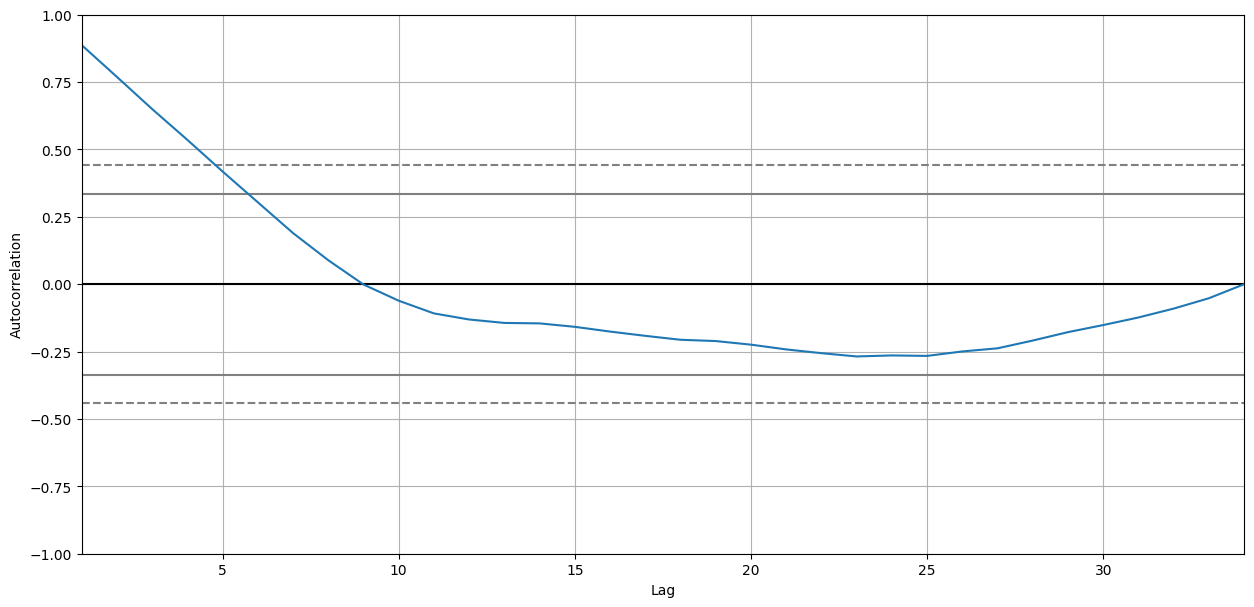

In [483]:
autocorrelation_plot(df_reorganized['Velocidade'])
plt.show()

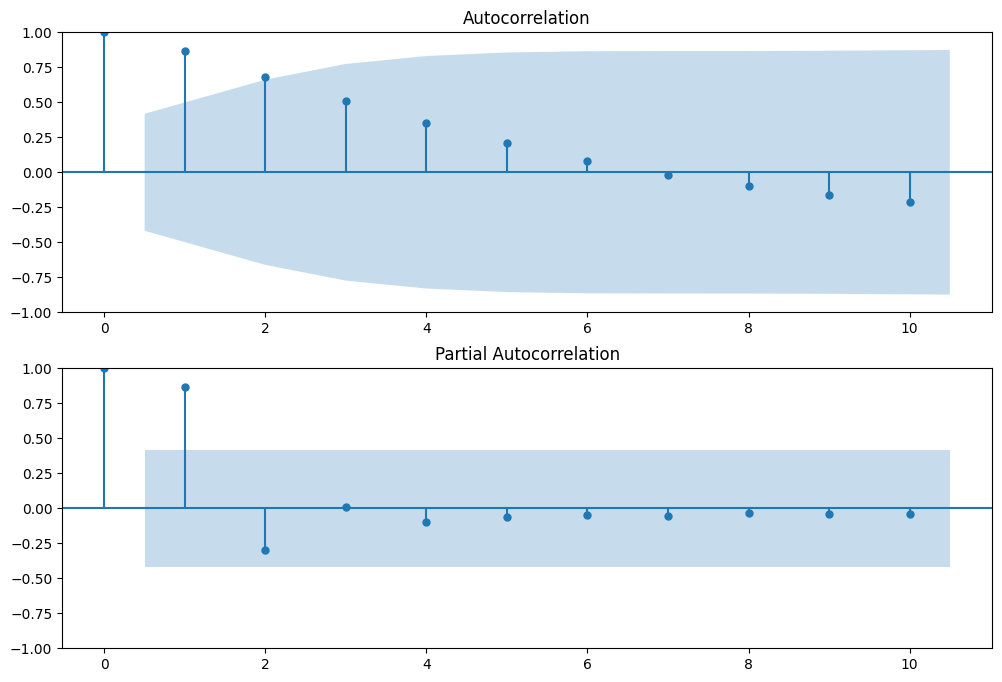

In [484]:
max_lags_acf = min(40, len(df_reorganized['Posicao sazonal diferenca'].dropna()) - 1)
max_lags_pacf = min(max_lags_acf, len(df_reorganized['Posicao sazonal diferenca'].dropna()) // 2 - 1)
max_lags = min(max_lags_acf, max_lags_pacf)

fig = plt.figure(figsize=(12, 8))

# Plotar ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df_reorganized['Posicao sazonal diferenca'].dropna(), lags=max_lags, ax=ax1)

# Plotar PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df_reorganized['Posicao sazonal diferenca'].dropna(), lags=max_lags, ax=ax2)

plt.show()

In [485]:
model=ARIMA(df_reorganized['Velocidade'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Velocidade   No. Observations:                   34
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -42.830
Date:                Fri, 05 Jul 2024   AIC                             91.660
Time:                        19:25:49   BIC                             96.149
Sample:                             0   HQIC                            93.171
                                 - 34                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9411      0.067     14.110      0.000       0.810       1.072
ma.L1         -0.5888      0.229     -2.566      0.010      -1.039      -0.139
sigma2         0.7620      0.230      3.310      0.001       0.311       1.213
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):                 1.69
Prob(Q):                              0.36   Prob(JB):                         0.43
Heteroskedasticity (H):               1.44   Skew:                            -0.54
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [486]:
model=ARIMA(df_reorganized['Posicao'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Posicao   No. Observations:                   34
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -102.370
Date:                Fri, 05 Jul 2024   AIC                            210.741
Time:                        19:25:51   BIC                            215.230
Sample:                             0   HQIC                           212.252
                                 - 34                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9899      0.017     59.298      0.000       0.957       1.023
ma.L1         -0.4690      0.195     -2.399      0.016      -0.852      -0.086
sigma2        26.5306      5.034      5.271      0.000      16.665      36.396
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):               425.81
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -3.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: xlabel='Tempo'>

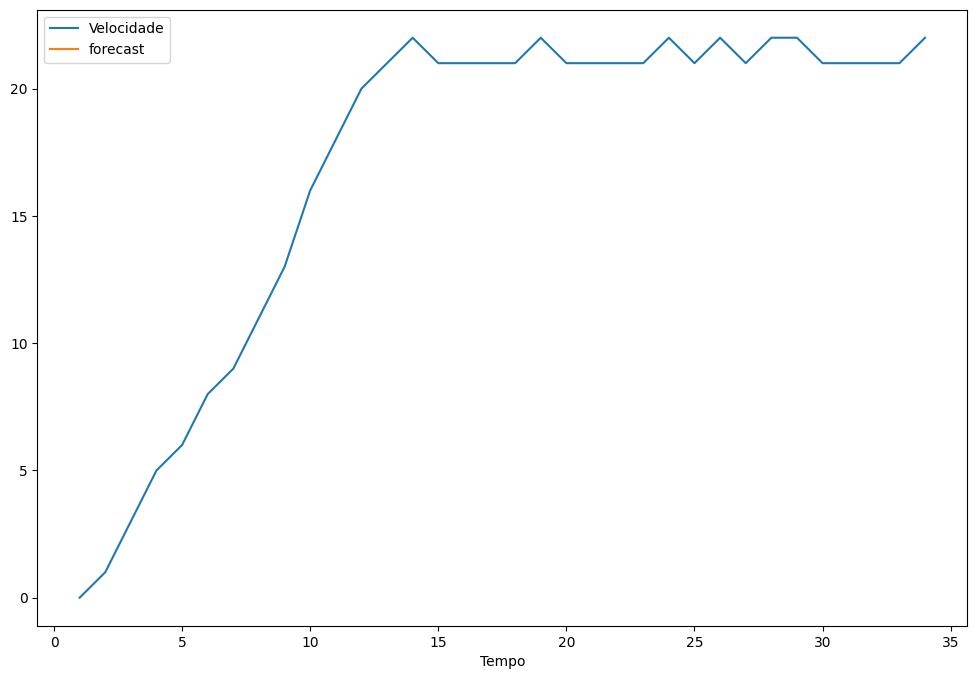

In [487]:
df_reorganized['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df_reorganized[['Velocidade','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: xlabel='Tempo'>

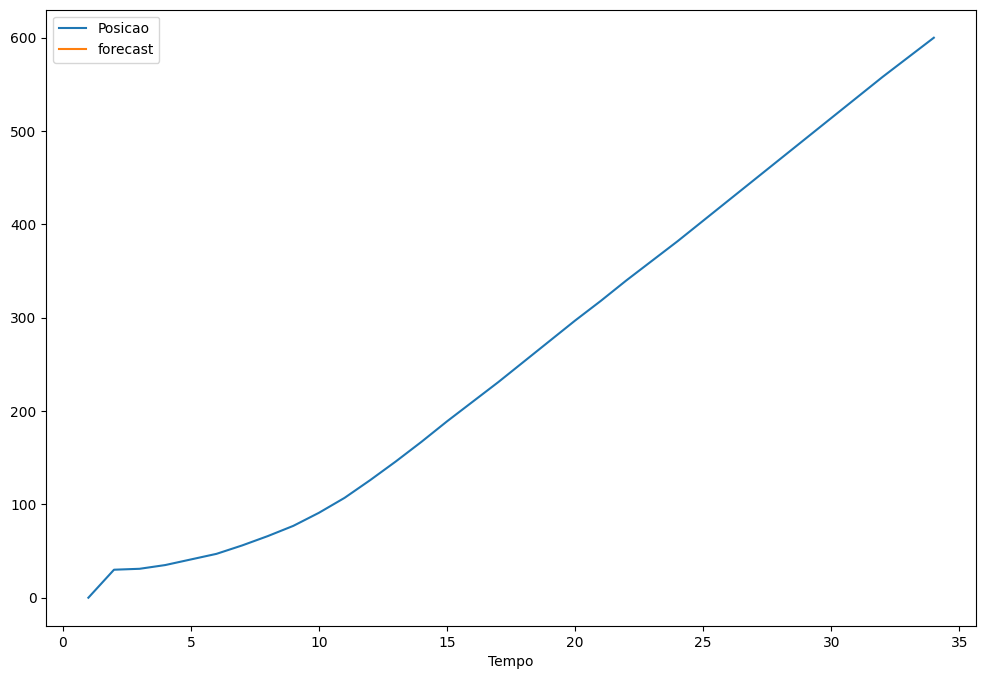

In [488]:
df_reorganized['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df_reorganized[['Posicao','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: Valu

<Axes: xlabel='Tempo'>

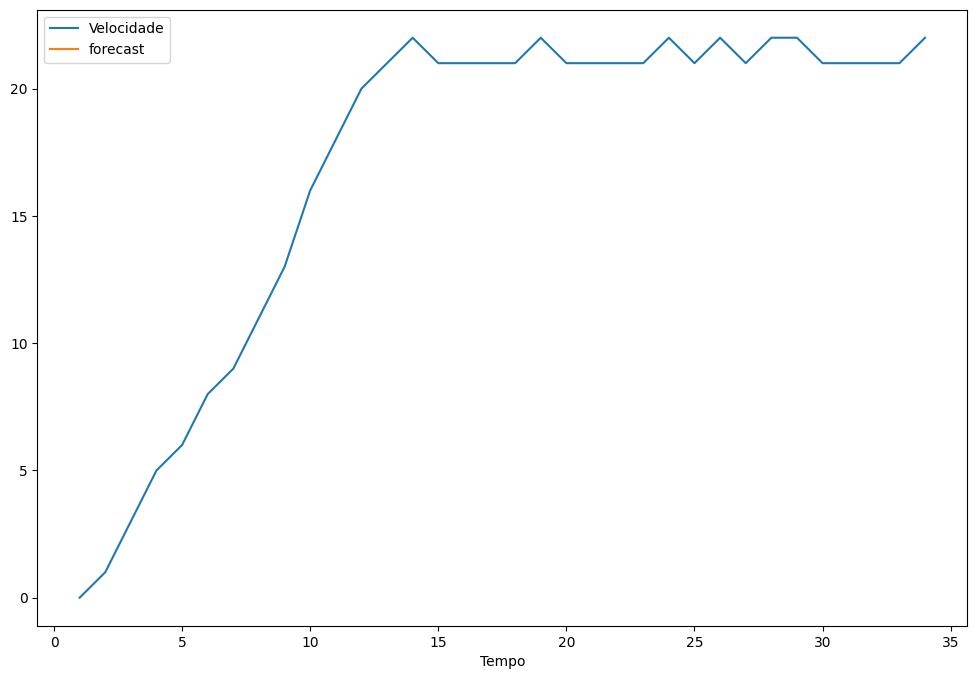

In [489]:
model=sm.tsa.statespace.SARIMAX(df_reorganized['Velocidade'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df_reorganized['forecast']=results.predict(start=90,end=103,dynamic=True)
df_reorganized[['Velocidade','forecast']].plot(figsize=(12,8))

<Axes: xlabel='Tempo'>

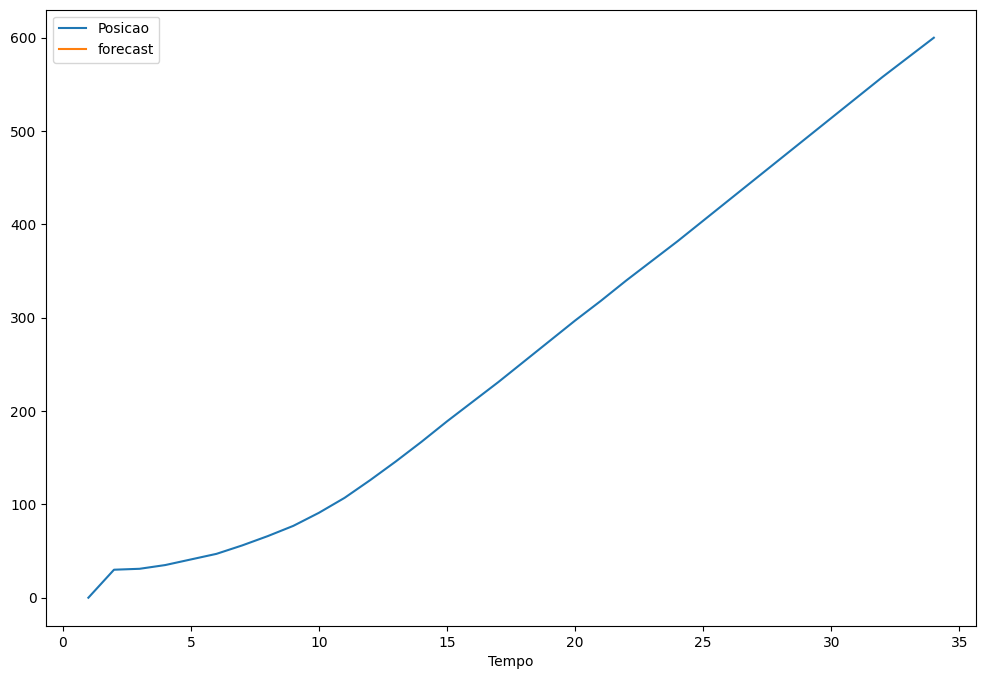

In [490]:
model=sm.tsa.statespace.SARIMAX(df['Posicao'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df_reorganized['forecast']=results.predict(start=90,end=103,dynamic=True)
df_reorganized[['Posicao','forecast']].plot(figsize=(12,8))

In [491]:
y = df_reorganized['Posicao']

In [492]:
train_size = int(len(y) * 0.7)
train, test = y[:train_size], y[train_size:]

In [493]:
auto_model = auto_arima(train, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=142.303, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=143.538, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=143.490, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=140.394, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.703 seconds


In [494]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [495]:
predictions = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [496]:
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 14.091766750410132
MSE: 306.2928247109177
RMSE: 17.501223520397588
R2: 0.935980667478501


In [497]:
print(df_reorganized.columns)

Index(['Velocidade', 'Posicao', 'Posicao diferenca',
       'Posicao sazonal diferenca', 'Posicao_dif', 'forecast'],
      dtype='object')


In [498]:
results_df = pd.DataFrame({
    'Posicao': df_reorganized['Posicao'],
    'Treinamento': np.append(train, [None] * len(test)),
    'Teste': np.append([None] * len(train), test),
    'Previsão': np.append([None] * len(train), predictions)
})

In [499]:
print(results_df)

       Posicao Treinamento Teste    Previsão
Tempo                                       
1            0           0  None        None
2           30          30  None        None
3           31          31  None        None
4           35          35  None        None
5           41          41  None        None
6           47          47  None        None
7           56          56  None        None
8           66          66  None        None
9           77          77  None        None
10          91          91  None        None
11         107         107  None        None
12         126         126  None        None
13         146         146  None        None
14         167         167  None        None
15         189         189  None        None
16         210         210  None        None
17         231         231  None        None
18         253         253  None        None
19         275         275  None        None
20         297         297  None        None
21        

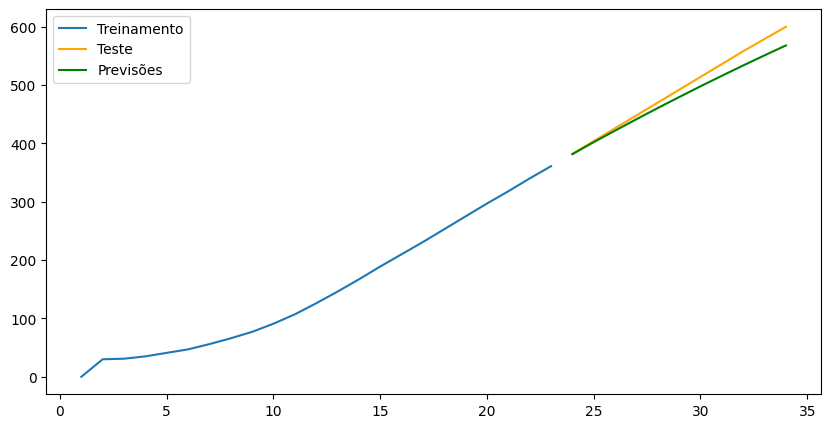

In [500]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Treinamento')
plt.plot(test.index, test, label='Teste', color='orange')
plt.plot(test.index, predictions, label='Previsões', color='green')
plt.legend()
plt.show()